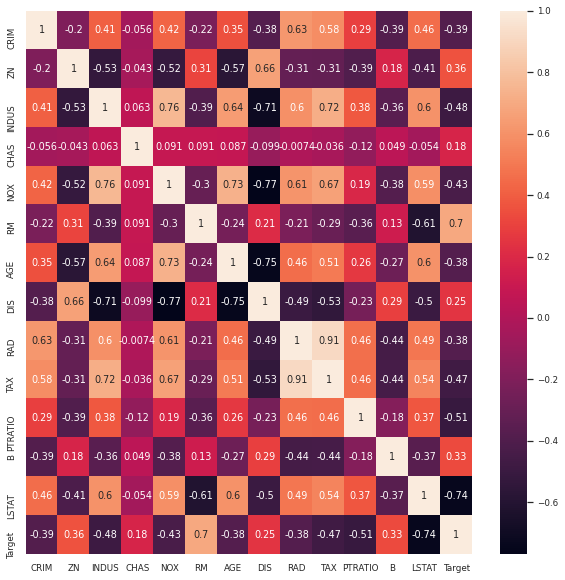

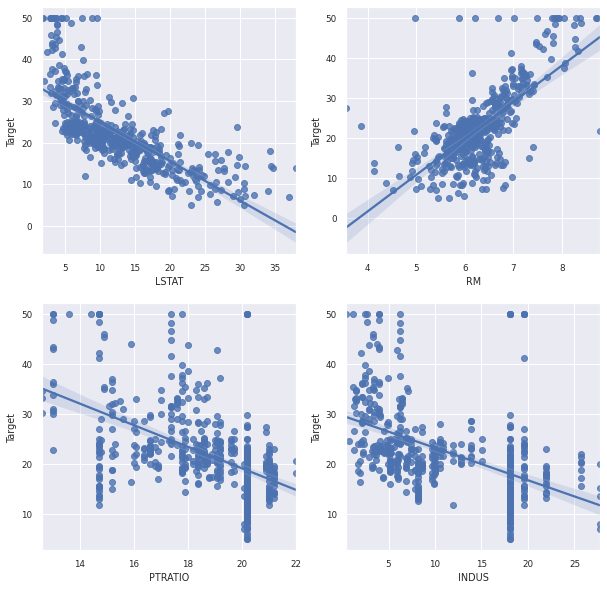

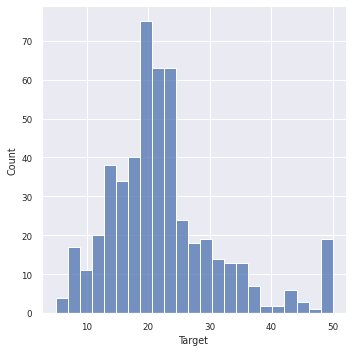

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
housing = datasets.load_boston()

data = pd.DataFrame(housing['data'], columns= housing['feature_names'])
target = pd.DataFrame(housing['target'],columns=['Target'])

df=pd.concat([data,target], axis=1)

df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr,annot=True, cbar=True)
plt.show()
corr_order = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False)
corr_order

plot_cols = ['Target','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:,plot_cols]
plot_df.head()

plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2, 2, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

sns.displot(x='Target', kind='hist', data=df)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:,:-1]=df_scaled[:,:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [ ]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['LSTAT','RM']]
Y_data = df.loc[:,'Target']
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,
                                                    test_size= 0.2,
                                                    shuffle=True,
                                                    random_state=12)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)
                                                

(404, 2) (404,)
(102, 2) (102,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

print("회귀계수(기울기):",np.round(lr.coef_,1))
print("상수항(절편):",np.round(lr.intercept_,1))

회귀계수(기울기): [-23.2  25.4]
상수항(절편): 16.3


In [ ]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
print(lr.fit(X_train, Y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


No handles with labels found to put in legend.


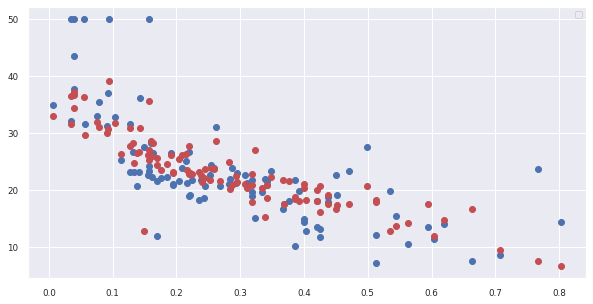

In [ ]:
Y_test_pred = lr.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'],Y_test)
plt.scatter(X_test['LSTAT'],Y_test_pred, c='r')
plt.legend(loc='best')
plt.show()